In [140]:
#imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

In [142]:
image_data = tf.keras.datasets.fashion_mnist

In [144]:
# Load MNIST dataset (as an example)
(x_train, y_train), (x_test, y_test) = image_data.load_data()

## adding class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data (normalize and reshape for CNN input)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("Training images shape:", x_train.shape)   
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


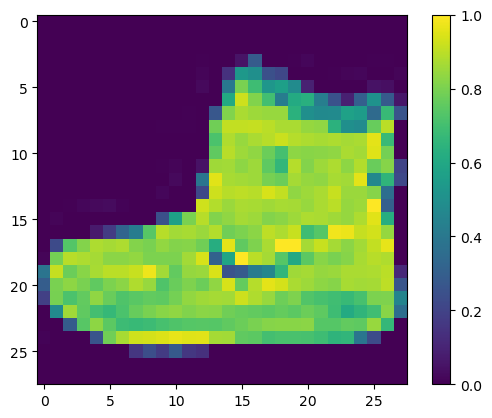

TypeError: only integer scalar arrays can be converted to a scalar index

In [145]:
# labels show nr9 which is the catagory Ankle boots
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

y_train[0]
class_names[y_train[0]]

In [ ]:
# Define the CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the 2D outputs to 1D to pass it to the fully connected layers
    layers.Flatten(),
    
    # Fully Connected (Dense) Layer 1
    layers.Dense(256, activation='relu'),
    
    # Fully Connected (Dense) Layer 2
    layers.Dense(128, activation='relu'),
    
    # Output Layer with softmax for multi-class classification (10 classes in this case)
    layers.Dense(10, activation='softmax')
])

# Model summary to check the architecture
model.summary()


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [149]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9686 - loss: 0.0831 - val_accuracy: 0.9100 - val_loss: 0.3324
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9737 - loss: 0.0708 - val_accuracy: 0.9071 - val_loss: 0.3549
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9729 - loss: 0.0699 - val_accuracy: 0.9126 - val_loss: 0.3587
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9793 - loss: 0.0550 - val_accuracy: 0.9004 - val_loss: 0.4357
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9807 - loss: 0.0525 - val_accuracy: 0.9115 - val_loss: 0.3954
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9825 - loss: 0.0482 - val_accuracy: 0.9080 - val_loss: 0.4629
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9833 - loss: 0.0431 - val_accuracy: 0.9067 - val_loss: 0.4386
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9844 - loss: 0.0401 - val_accuracy: 0.

In [150]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9164 - loss: 0.4518
Test Accuracy: 0.916100025177002


In [151]:
# Make predictions on the test set
predictions = model.predict(x_test)
print(predictions[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.1231098e-13 5.7779611e-16 5.3639918e-19 6.4395594e-17 2.6936736e-15
 4.7477675e-11 1.2418484e-18 5.7041415e-14 1.8742250e-18 1.0000000e+00]


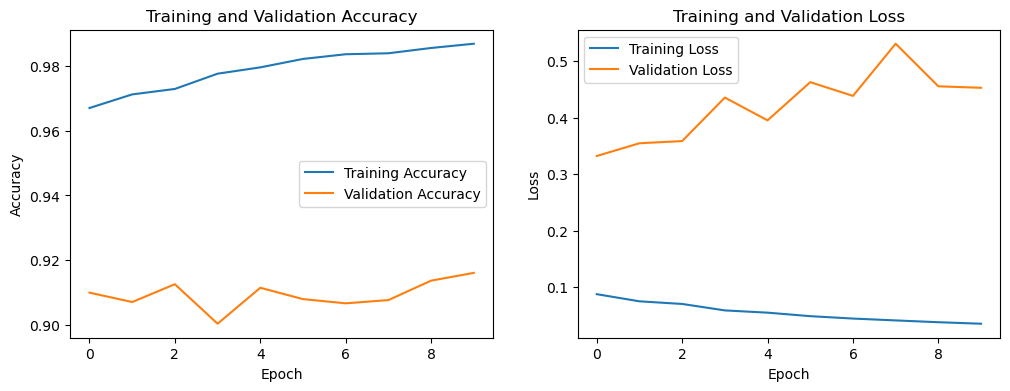

In [152]:

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
